In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math
import datetime as dt
import numpy as np
from bokeh.plotting import show
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
import random
import matplotlib.pyplot as plt
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

pd.set_option("display.max_columns", None)

# <span style='color:green'> **[done]** </span>Loading pre-processed data

In [2]:
loc = "C:/Users/sagic/[2] UFC_Predictor/data/"
file = 'ufc_data.csv'
df = pd.read_csv(loc+file)
df = df[df.columns[1:]]
df.head(3)

,w/l,fighter,kd,str,td,sub,weight class,method,round,time,date,w_fighter,l_fighter,w_kd,l_kd,w_str,l_str,w_td,l_td,w_sub,l_sub,w_win_perc,l_win_perc,w_win_strk,l_win_strk,w_lose_strk,l_lose_strk,ttime,w_wins,w_losses,w_draws,w_height,w_weight,w_reach,w_stance,w_age,w_slpm,w_str. acc.,w_sapm,w_str. def,w_td avg.,w_td acc.,w_td def.,w_sub. avg.,l_wins,l_losses,l_draws,l_height,l_weight,l_reach,l_stance,l_age,l_slpm,l_str. acc.,l_sapm,l_str. def,l_td avg.,l_td acc.,l_td def.,l_sub. avg.
0,win,Ciryl Gane:Tai Tuivasa,1:1,110:29,0:0,0:0,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Ciryl Gane,Tai Tuivasa,1,1,110,29,0,0,0,0,0.89,0.67,1,0,0,1,14.383,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,15.0,4.0,0,187.96,118.80,190.50,Southpaw,29.0,4.12,0.50,4.24,0.45,0.00,0.00,0.52,0.0
1,win,Robert Whittaker:Marvin Vettori,0:0,74:33,1:0,0:0,Middleweight,U-DEC:,3,5:00,2022-09-03,Robert Whittaker,Marvin Vettori,0,0,74,33,1,0,0,0,0.79,0.67,1,0,0,1,15.000,25.0,6.0,0,182.88,83.25,185.42,Orthodox,32.0,4.48,0.42,3.26,0.61,0.82,0.37,0.84,0.0,18.0,6.0,1,182.88,83.25,187.96,Southpaw,29.0,4.20,0.44,3.58,0.59,1.89,0.44,0.74,0.6
2,win,Nassourdine Imavov:Joaquin Buckley,0:0,51:46,2:0,2:0,Middleweight,U-DEC:,3,5:00,2022-09-03,Nassourdine Imavov,Joaquin Buckley,0,0,51,46,2,0,2,0,0.80,0.62,3,0,0,1,15.000,12.0,3.0,0,190.50,83.25,190.50,Orthodox,27.0,4.08,0.54,2.43,0.62,0.95,0.23,0.76,2.4,15.0,5.0,0,177.80,83.25,193.04,Southpaw,28.0,3.61,0.32,3.42,0.54,1.35,0.30,0.66,0.0


In [3]:
df = df.rename(columns={'w/l':'result','fighter':'match','w_fighter':'fighter','l_fighter':'opponent'})
df['result'] = 'win'
df['date'] = pd.to_datetime(df['date'])
df = df.drop(columns=['kd','str','td','sub'])
df.head(3)

,result,match,weight class,method,round,time,date,fighter,opponent,w_kd,l_kd,w_str,l_str,w_td,l_td,w_sub,l_sub,w_win_perc,l_win_perc,w_win_strk,l_win_strk,w_lose_strk,l_lose_strk,ttime,w_wins,w_losses,w_draws,w_height,w_weight,w_reach,w_stance,w_age,w_slpm,w_str. acc.,w_sapm,w_str. def,w_td avg.,w_td acc.,w_td def.,w_sub. avg.,l_wins,l_losses,l_draws,l_height,l_weight,l_reach,l_stance,l_age,l_slpm,l_str. acc.,l_sapm,l_str. def,l_td avg.,l_td acc.,l_td def.,l_sub. avg.
0,win,Ciryl Gane:Tai Tuivasa,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Ciryl Gane,Tai Tuivasa,1,1,110,29,0,0,0,0,0.89,0.67,1,0,0,1,14.383,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,15.0,4.0,0,187.96,118.80,190.50,Southpaw,29.0,4.12,0.50,4.24,0.45,0.00,0.00,0.52,0.0
1,win,Robert Whittaker:Marvin Vettori,Middleweight,U-DEC:,3,5:00,2022-09-03,Robert Whittaker,Marvin Vettori,0,0,74,33,1,0,0,0,0.79,0.67,1,0,0,1,15.000,25.0,6.0,0,182.88,83.25,185.42,Orthodox,32.0,4.48,0.42,3.26,0.61,0.82,0.37,0.84,0.0,18.0,6.0,1,182.88,83.25,187.96,Southpaw,29.0,4.20,0.44,3.58,0.59,1.89,0.44,0.74,0.6
2,win,Nassourdine Imavov:Joaquin Buckley,Middleweight,U-DEC:,3,5:00,2022-09-03,Nassourdine Imavov,Joaquin Buckley,0,0,51,46,2,0,2,0,0.80,0.62,3,0,0,1,15.000,12.0,3.0,0,190.50,83.25,190.50,Orthodox,27.0,4.08,0.54,2.43,0.62,0.95,0.23,0.76,2.4,15.0,5.0,0,177.80,83.25,193.04,Southpaw,28.0,3.61,0.32,3.42,0.54,1.35,0.30,0.66,0.0


## Column's Legend:
****
* <span style='color:blue'> **'f_'** </span> - Fighter statistic column
* <span style='color:blue'> **'o_'** </span> - Opponent statistic column

In [4]:
# create winner vs opponent data table

for column in df.columns:
    if column.startswith('w_') == True:
        df = df.rename(columns={column:'f_'+column[2:]})
    elif column.startswith('l_') == True:
        df = df.rename(columns={column:'o_'+column[2:]})
        
df.columns    

Index(['result', 'match', 'weight class', 'method', 'round', 'time', 'date',
       'fighter', 'opponent', 'f_kd', 'o_kd', 'f_str', 'o_str', 'f_td', 'o_td',
       'f_sub', 'o_sub', 'f_win_perc', 'o_win_perc', 'f_win_strk',
       'o_win_strk', 'f_lose_strk', 'o_lose_strk', 'ttime', 'f_wins',
       'f_losses', 'f_draws', 'f_height', 'f_weight', 'f_reach', 'f_stance',
       'f_age', 'f_slpm', 'f_str. acc.', 'f_sapm', 'f_str. def', 'f_td avg.',
       'f_td acc.', 'f_td def.', 'f_sub. avg.', 'o_wins', 'o_losses',
       'o_draws', 'o_height', 'o_weight', 'o_reach', 'o_stance', 'o_age',
       'o_slpm', 'o_str. acc.', 'o_sapm', 'o_str. def', 'o_td avg.',
       'o_td acc.', 'o_td def.', 'o_sub. avg.'],
      dtype='object')

# <span style='color:green'> **[done]** </span>Feature Y


### <span style='color:green'> **[done]** </span> Function setup:
 * <span style='color:green'> **[done]** </span> get_stat(index, data, stat, corner)
 * <span style='color:green'> **[done]** </span> get_swaped_row(index, data=df)

In [5]:
def get_stat(index, data=df, stat='height', fo=''):
    return data.loc[index, fo + stat]

In [6]:
def get_swaped_row(index, data=df):
    
    '''return row with opponent as winner and statistics swapped'''
    
    swapped_row = np.array([])
    
    for column in data.columns:
        
        if column.find('f_') > -1: # f_ will get opponent stats
            swapped_row = np.append(swapped_row, get_stat(index, data=df, stat=column[2:], fo='o_'))
        elif column.find('o_') > -1: # o_ will get fighter stats
            swapped_row = np.append(swapped_row, get_stat(index, data=df, stat=column[2:], fo='f_'))          
        elif column == 'result':
            swapped_row = np.append(swapped_row, 'lose')
        elif column == 'fighter':
            swapped_row = np.append(swapped_row, get_stat(index, data=df, stat='opponent'))
        elif column == 'opponent':
            swapped_row = np.append(swapped_row, get_stat(index, data=df, stat='fighter'))
        else:
            swapped_row = np.append(swapped_row, get_stat(index, data=df, stat=column))
    
    return swapped_row

In [7]:
original_size = len(df)

for index in range(0,original_size): 
    print('%d%% Completed' %(round((index/original_size)*100,2)), end ='\r')
    if random.random() > 0.5:
        df.loc[index] = get_swaped_row(index, data=df)

print('\nDone')        
df['result'].value_counts()
df.head(3)

99% Completed
Done


,result,match,weight class,method,round,time,date,fighter,opponent,f_kd,o_kd,f_str,o_str,f_td,o_td,f_sub,o_sub,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,ttime,f_wins,f_losses,f_draws,f_height,f_weight,f_reach,f_stance,f_age,f_slpm,f_str. acc.,f_sapm,f_str. def,f_td avg.,f_td acc.,f_td def.,f_sub. avg.,o_wins,o_losses,o_draws,o_height,o_weight,o_reach,o_stance,o_age,o_slpm,o_str. acc.,o_sapm,o_str. def,o_td avg.,o_td acc.,o_td def.,o_sub. avg.
0,win,Ciryl Gane:Tai Tuivasa,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Ciryl Gane,Tai Tuivasa,1,1,110,29,0,0,0,0,0.89,0.67,1,0,0,1,14.383,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,15.0,4.0,0,187.96,118.80,190.50,Southpaw,29.0,4.12,0.50,4.24,0.45,0.00,0.00,0.52,0.0
1,win,Robert Whittaker:Marvin Vettori,Middleweight,U-DEC:,3,5:00,2022-09-03,Robert Whittaker,Marvin Vettori,0,0,74,33,1,0,0,0,0.79,0.67,1,0,0,1,15.000,25.0,6.0,0,182.88,83.25,185.42,Orthodox,32.0,4.48,0.42,3.26,0.61,0.82,0.37,0.84,0.0,18.0,6.0,1,182.88,83.25,187.96,Southpaw,29.0,4.20,0.44,3.58,0.59,1.89,0.44,0.74,0.6
2,win,Nassourdine Imavov:Joaquin Buckley,Middleweight,U-DEC:,3,5:00,2022-09-03,Nassourdine Imavov,Joaquin Buckley,0,0,51,46,2,0,2,0,0.80,0.62,3,0,0,1,15.000,12.0,3.0,0,190.50,83.25,190.50,Orthodox,27.0,4.08,0.54,2.43,0.62,0.95,0.23,0.76,2.4,15.0,5.0,0,177.80,83.25,193.04,Southpaw,28.0,3.61,0.32,3.42,0.54,1.35,0.30,0.66,0.0


## Column's Legend:
****
* <span style='color:blue'> **SLpM** </span> - Significant Strikes Landed per Minute
* <span style='color:blue'> **Str. Acc.** </span> - Significant Striking Accuracy
* <span style='color:blue'> **SApM** </span> - Significant Strikes Absorbed per Minute
* <span style='color:blue'> **Str. Def.** </span> - Significant Strike Defence (the % of opponents strikes that did not land)
* <span style='color:blue'> **TD Avg.** </span> - Average Takedowns Landed per 15 minutes
* <span style='color:blue'> **TD Acc.** </span> - Takedown Accuracy
* <span style='color:blue'> **TD Def.** </span> - Takedown Defense (the % of opponents TD attempts that did not land)
* <span style='color:blue'> **Sub. Avg.** </span> - Average Submissions Attempted per 15 minutes

# <span style='color:green'> **[done]** </span> Feature Engineering = TakeDowns:
Exploring takedowns as feature using the following columns:
* <span style='color:blue'> **TD Avg.** </span> column
* <span style='color:blue'> **TD Acc.** </span> column
* <span style='color:blue'> **TD Def.** </span> column

In [8]:
tdf = df[['result','match','f_td avg.','f_td acc.','f_td def.','o_td avg.','o_td acc.','o_td def.']]
tdf.head(3)

,result,match,f_td avg.,f_td acc.,f_td def.,o_td avg.,o_td acc.,o_td def.
0,win,Ciryl Gane:Tai Tuivasa,0.62,0.21,0.55,0.00,0.00,0.52
1,win,Robert Whittaker:Marvin Vettori,0.82,0.37,0.84,1.89,0.44,0.74
2,win,Nassourdine Imavov:Joaquin Buckley,0.95,0.23,0.76,1.35,0.30,0.66


In [9]:
tdf['td_avg_dif'] = tdf['f_td avg.']-tdf['o_td avg.']
tdf['td_acc_dif'] = tdf['f_td acc.']-tdf['o_td acc.']
tdf['td_def_dif'] = tdf['f_td def.']-tdf['o_td def.']
tdf = tdf[['result','match','td_avg_dif','td_acc_dif','td_def_dif']]
tdf.head(3)

C:\Users\sagic\AppData\Local\Temp\ipykernel_22700\4097223721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['td_avg_dif'] = tdf['f_td avg.']-tdf['o_td avg.']
C:\Users\sagic\AppData\Local\Temp\ipykernel_22700\4097223721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['td_acc_dif'] = tdf['f_td acc.']-tdf['o_td acc.']
C:\Users\sagic\AppData\Local\Temp\ipykernel_22700\4097223721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,result,match,td_avg_dif,td_acc_dif,td_def_dif
0,win,Ciryl Gane:Tai Tuivasa,0.62,0.21,0.03
1,win,Robert Whittaker:Marvin Vettori,-1.07,-0.07,0.10
2,win,Nassourdine Imavov:Joaquin Buckley,-0.40,-0.07,0.10


<AxesSubplot:xlabel='result', ylabel='td_avg_dif'>

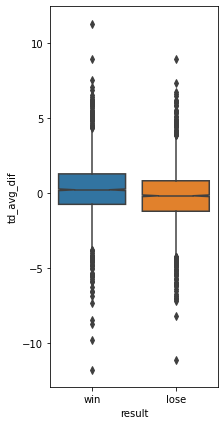

In [10]:
plt.figure(figsize = (3,7))
sns.boxplot(data=tdf, x='result', y='td_avg_dif',notch=True, showcaps=False)

<AxesSubplot:xlabel='result', ylabel='td_acc_dif'>

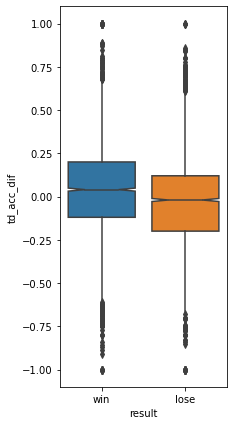

In [11]:
plt.figure(figsize = (3,7))
sns.boxplot(data=tdf, 
            x='result', 
            y='td_acc_dif',
            notch=True, 
            showcaps=False)

<AxesSubplot:xlabel='result', ylabel='td_def_dif'>

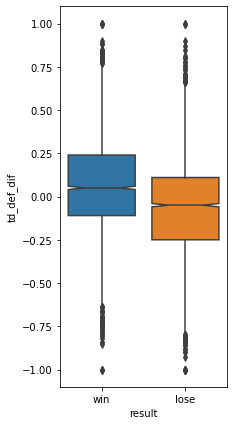

In [12]:
plt.figure(figsize = (3,7))
sns.boxplot(data=tdf, x='result', y='td_def_dif',notch=True, showcaps=False)

takedowns accuracy & td defence contains significant enough difference between winner & loser > will be included as features

In [13]:
columns = ['td_acc_dif', 'td_def_dif']

for column in columns:
    tdf['norm_' + column] = (tdf[column] - np.mean(tdf[column]))/np.std(tdf[column])

tdf = tdf[['result','match','norm_td_acc_dif','norm_td_def_dif']]    
tdf.head()    

,result,match,norm_td_acc_dif,norm_td_def_dif
0,win,Ciryl Gane:Tai Tuivasa,0.724572,0.110516
1,win,Robert Whittaker:Marvin Vettori,-0.253083,0.344439
2,win,Nassourdine Imavov:Joaquin Buckley,-0.253083,0.344439
3,win,Roman Kopylov:Alessio Di Chirico,-0.218166,0.143933
4,win,William Gomis:Jarno Errens,2.086306,2.015319


In [14]:
features = []
new_features = ['norm_td_acc_dif','norm_td_def_dif']

for feature in new_features:
    features.append(feature)
    df[feature] = tdf[feature]

print('+ Features:')    
print(features)    

+ Features:
['norm_td_acc_dif', 'norm_td_def_dif']


# <span style='color:green'> **[done]** </span> Feature Engineering = Submissions:
Exploring submissions as feature using the following columns:
* <span style='color:blue'> **Sub. Avg.** </span> column = average submission attempts

In [15]:
columns = ['result','match','f_sub. avg.','o_sub. avg.']
sub_df = df[columns]
sub_df.head(3)

,result,match,f_sub. avg.,o_sub. avg.
0,win,Ciryl Gane:Tai Tuivasa,0.5,0.0
1,win,Robert Whittaker:Marvin Vettori,0.0,0.6
2,win,Nassourdine Imavov:Joaquin Buckley,2.4,0.0


In [16]:
sub_df.describe()

,f_sub. avg.,o_sub. avg.
count,6662.000000,6662.000000
mean,0.640123,0.641399
std,0.793780,0.775511
min,0.000000,0.000000
25%,0.100000,0.100000
50%,0.400000,0.400000
75%,0.900000,0.900000
max,16.400000,14.300000


it seems there is no impact of sub average on the fight outcome, 
i will check what is the case with fights that ended with submission:

In [17]:
mask = df['method'].str.contains('SUB:')
test_sub_df = df.loc[mask, ['result','match','f_sub. avg.','o_sub. avg.']]
test_sub_df['sub_avg_dif'] = test_sub_df['f_sub. avg.'] - test_sub_df['o_sub. avg.']
test_sub_df.head()

,result,match,f_sub. avg.,o_sub. avg.,sub_avg_dif
11,lose,Stephanie Egger:Ailin Perez,0.0,0.8,-0.8
28,win,Frank Mir:Pete Williams,2.0,0.9,1.1
29,lose,Matt Serra:Kelly Dullanty,0.0,0.9,-0.9
32,lose,Jacare Souza:Chris Camozzi,0.5,1.3,-0.8
36,win,Francisco Trinaldo:Mike Rio,0.5,1.0,-0.5


<AxesSubplot:xlabel='result', ylabel='sub_avg_dif'>

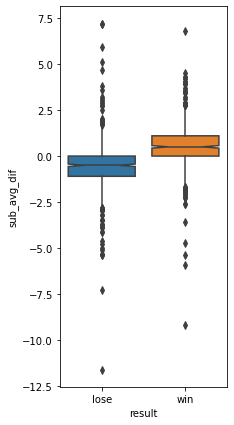

In [18]:
plt.figure(figsize = (3,7))
sns.boxplot(data=test_sub_df, x='result', y='sub_avg_dif',notch=True, showcaps=False)

after filtering only the fights that ended with submissions we see an impact of "sub average", i will use it as a feature due to the fact that submission have big impact of how fighters fight(even though it might not end with sub)

In [19]:
column = 'sub_avg_dif'
sub_df['sub_avg_dif'] = sub_df['f_sub. avg.'] - sub_df['o_sub. avg.']
sub_df['norm_' + column] = (sub_df[column] - np.mean(sub_df[column]))/np.std(sub_df[column])
sub_df = sub_df[['result','match','norm_'+ column]]    
sub_df.head()   

C:\Users\sagic\AppData\Local\Temp\ipykernel_22700\3879246811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['sub_avg_dif'] = sub_df['f_sub. avg.'] - sub_df['o_sub. avg.']
C:\Users\sagic\AppData\Local\Temp\ipykernel_22700\3879246811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['norm_' + column] = (sub_df[column] - np.mean(sub_df[column]))/np.std(sub_df[column])


,result,match,norm_sub_avg_dif
0,win,Ciryl Gane:Tai Tuivasa,0.476462
1,win,Robert Whittaker:Marvin Vettori,-0.569086
2,win,Nassourdine Imavov:Joaquin Buckley,2.282409
3,win,Roman Kopylov:Alessio Di Chirico,0.001213
4,win,William Gomis:Jarno Errens,-0.949286


In [20]:
features.append('norm_sub_avg_dif')  
df['norm_sub_avg_dif'] = sub_df['norm_sub_avg_dif']
print(features)  

['norm_td_acc_dif', 'norm_td_def_dif', 'norm_sub_avg_dif']


# <span style='color:green'> **[done]** </span> Feature Engineering = Striking:

* <span style='color:blue'> **SLpM** </span> - Significant Strikes Landed per Minute
* <span style='color:blue'> **Str. Acc.** </span> - Significant Striking Accuracy
* <span style='color:blue'> **SApM** </span> - Significant Strikes Absorbed per Minute
* <span style='color:blue'> **Str. Def.** </span> - Significant Strike Defence (the % of opponents strikes that did not land)

In [21]:
str_df = df[['result','match','method','f_str','o_str','f_slpm','o_slpm','f_str. acc.','o_str. acc.','f_sapm','o_sapm','f_str. def','o_str. def']]

columns = ['str','slpm','str. def','str. acc.','sapm']
for column in columns:
    str_df[column + '_dif'] = str_df['f_' + column] - str_df['o_' + column]

str_df.head()

C:\Users\sagic\AppData\Local\Temp\ipykernel_22700\3781107051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  str_df[column + '_dif'] = str_df['f_' + column] - str_df['o_' + column]
C:\Users\sagic\AppData\Local\Temp\ipykernel_22700\3781107051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  str_df[column + '_dif'] = str_df['f_' + column] - str_df['o_' + column]
C:\Users\sagic\AppData\Local\Temp\ipykernel_22700\3781107051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,result,match,method,f_str,o_str,f_slpm,o_slpm,f_str. acc.,o_str. acc.,f_sapm,o_sapm,f_str. def,o_str. def,str_dif,slpm_dif,str. def_dif,str. acc._dif,sapm_dif
0,win,Ciryl Gane:Tai Tuivasa,KO/TKO:Punches,110,29,5.11,4.12,0.59,0.50,2.25,4.24,0.62,0.45,81,0.99,0.17,0.09,-1.99
1,win,Robert Whittaker:Marvin Vettori,U-DEC:,74,33,4.48,4.20,0.42,0.44,3.26,3.58,0.61,0.59,41,0.28,0.02,-0.02,-0.32
2,win,Nassourdine Imavov:Joaquin Buckley,U-DEC:,51,46,4.08,3.61,0.54,0.32,2.43,3.42,0.62,0.54,5,0.47,0.08,0.22,-0.99
3,win,Roman Kopylov:Alessio Di Chirico,KO/TKO:Punches,59,39,3.44,3.32,0.44,0.39,3.81,3.44,0.60,0.61,20,0.12,-0.01,0.05,0.37
4,win,William Gomis:Jarno Errens,U-DEC:,32,20,2.13,1.33,0.45,0.37,1.33,2.13,0.62,0.54,12,0.80,0.08,0.08,-0.80


<AxesSubplot:xlabel='result', ylabel='str_dif'>

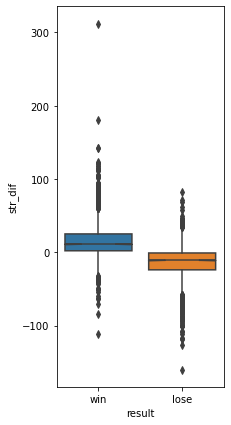

In [22]:
plt.figure(figsize = (3,7))
sns.boxplot(data=str_df, x='result', y='str_dif',notch=True, showcaps=False)

<AxesSubplot:xlabel='result', ylabel='slpm_dif'>

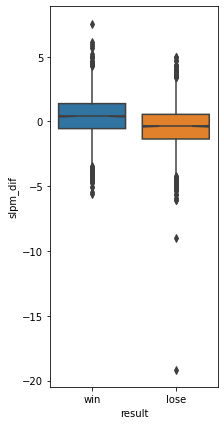

In [23]:
plt.figure(figsize = (3,7))
sns.boxplot(data=str_df, x='result', y='slpm_dif',notch=True, showcaps=False)

<AxesSubplot:xlabel='result', ylabel='slpm_dif'>

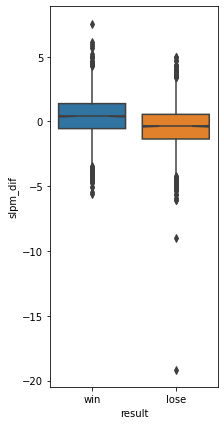

In [24]:
plt.figure(figsize = (3,7))
sns.boxplot(data=str_df, x='result', y='slpm_dif',notch=True, showcaps=False)

<AxesSubplot:xlabel='result', ylabel='str. acc._dif'>

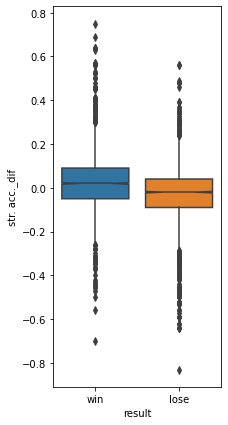

In [25]:
plt.figure(figsize = (3,7))
sns.boxplot(data=str_df, x='result', y='str. acc._dif',notch=True, showcaps=False)

<AxesSubplot:xlabel='result', ylabel='sapm_dif'>

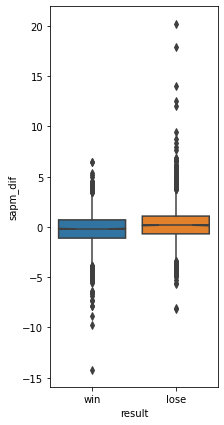

In [26]:
plt.figure(figsize = (3,7))
sns.boxplot(data=str_df, x='result', y='sapm_dif',notch=True, showcaps=False)

striking statistics seems to have significant effect on the winner > will normalize & include all of them as features 

In [27]:
str_df = str_df[['result','match','method','str_dif','slpm_dif','str. def_dif','str. acc._dif','sapm_dif']]
str_columns = str_df.columns[3:]

for column in str_columns:
    str_df[column] = (str_df[column] - np.mean(str_df[column]))/np.std(str_df[column])
    
str_df.head()    

,result,match,method,str_dif,slpm_dif,str. def_dif,str. acc._dif,sapm_dif
0,win,Ciryl Gane:Tai Tuivasa,KO/TKO:Punches,3.040149,0.631003,1.434947,0.749286,-1.221804
1,win,Robert Whittaker:Marvin Vettori,U-DEC:,1.536313,0.182952,0.174427,-0.142357,-0.196676
2,win,Nassourdine Imavov:Joaquin Buckley,U-DEC:,0.182861,0.302853,0.678635,1.803046,-0.607955
3,win,Roman Kopylov:Alessio Di Chirico,KO/TKO:Punches,0.746799,0.081983,-0.077677,0.425052,0.226880
4,win,William Gomis:Jarno Errens,U-DEC:,0.446032,0.511102,0.678635,0.668227,-0.491323


In [28]:
new_features = ['str_dif','slpm_dif','str. def_dif','str. acc._dif','sapm_dif']

for feature in new_features:
    features.append(feature)
    df[feature] = str_df[feature]
    
print(features)   

['norm_td_acc_dif', 'norm_td_def_dif', 'norm_sub_avg_dif', 'str_dif', 'slpm_dif', 'str. def_dif', 'str. acc._dif', 'sapm_dif']


# <span style='color:green'> **[done]** </span> Feature Engineering = Height:

In [29]:
hdf = df[['result','match','method','weight class','f_height','o_height']]
hdf['height_df'] = hdf['f_height'] - hdf['o_height']
hdf['height_df'] = (hdf['height_df'] - np.mean(hdf['height_df']))/np.std(hdf['height_df'])
hdf.head(3)

C:\Users\sagic\AppData\Local\Temp\ipykernel_22700\1317908503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdf['height_df'] = hdf['f_height'] - hdf['o_height']
C:\Users\sagic\AppData\Local\Temp\ipykernel_22700\1317908503.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdf['height_df'] = (hdf['height_df'] - np.mean(hdf['height_df']))/np.std(hdf['height_df'])


,result,match,method,weight class,f_height,o_height,height_df
0,win,Ciryl Gane:Tai Tuivasa,KO/TKO:Punches,Heavyweight,193.04,187.96,0.762403
1,win,Robert Whittaker:Marvin Vettori,U-DEC:,Middleweight,182.88,182.88,-0.011979
2,win,Nassourdine Imavov:Joaquin Buckley,U-DEC:,Middleweight,190.50,177.80,1.923975


<AxesSubplot:xlabel='result', ylabel='height_df'>

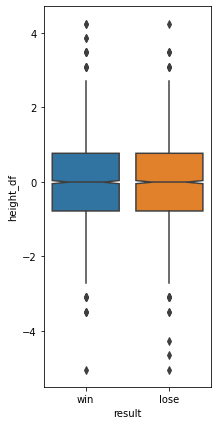

In [30]:
plt.figure(figsize = (3,7))
sns.boxplot(data=hdf, x='result', y='height_df',notch=True, showcaps=False)

height has no significant effect on fight outcome > will be dropped

# <span style='color:green'> **[done]** </span> Feature Engineering = Reach:

In [31]:
rdf = df[['result','match','method','weight class','f_reach','o_reach']]
rdf['reach_dif'] = rdf['f_reach'] - rdf['o_reach']
rdf['reach_dif'] = (rdf['reach_dif'] - np.mean(rdf['reach_dif']))/np.std(rdf['reach_dif'])
rdf.head(3)

C:\Users\sagic\AppData\Local\Temp\ipykernel_22700\2431479937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf['reach_dif'] = rdf['f_reach'] - rdf['o_reach']
C:\Users\sagic\AppData\Local\Temp\ipykernel_22700\2431479937.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf['reach_dif'] = (rdf['reach_dif'] - np.mean(rdf['reach_dif']))/np.std(rdf['reach_dif'])


,result,match,method,weight class,f_reach,o_reach,reach_dif
0,win,Ciryl Gane:Tai Tuivasa,KO/TKO:Punches,Heavyweight,205.74,190.50,1.812811
1,win,Robert Whittaker:Marvin Vettori,U-DEC:,Middleweight,185.42,187.96,-0.334521
2,win,Nassourdine Imavov:Joaquin Buckley,U-DEC:,Middleweight,190.50,193.04,-0.334521


<AxesSubplot:xlabel='result', ylabel='reach_dif'>

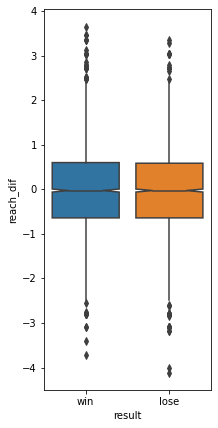

In [32]:
plt.figure(figsize = (3,7))
sns.boxplot(data=rdf, x='result', y='reach_dif',notch=True, showcaps=False)

no significant effect on fight outcome > will be dropped

# <span style='color:green'> **[done]** </span> Feature Engineering = stance:

In [33]:
stance_df = df[['result','match','f_stance','o_stance']]
stance_df['stance_combo'] = stance_df['f_stance'] + ':' + stance_df['o_stance']
stance_df.head(3)

C:\Users\sagic\AppData\Local\Temp\ipykernel_22700\4051435966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stance_df['stance_combo'] = stance_df['f_stance'] + ':' + stance_df['o_stance']


,result,match,f_stance,o_stance,stance_combo
0,win,Ciryl Gane:Tai Tuivasa,Orthodox,Southpaw,Orthodox:Southpaw
1,win,Robert Whittaker:Marvin Vettori,Orthodox,Southpaw,Orthodox:Southpaw
2,win,Nassourdine Imavov:Joaquin Buckley,Orthodox,Southpaw,Orthodox:Southpaw


### Functions setup:

In [34]:
def get_wins(combo, data=stance_df):

    data = data[(data.result=='win') & (data.stance_combo==combo)]
    return len(data)

In [35]:
def get_wins_ratio(combo, data=stance_df):
    
    combo_df = data[data.stance_combo==combo]
    return get_wins(combo, data=data)/len(combo_df)

In [36]:
stance_df['stance_win_ratio'] = None

for combo,i in zip(stance_df['stance_combo'],range(0,len(df))):
    print()
    stance_df.loc[i, 'stance_win_ratio'] = get_wins_ratio(combo)
    
stance_df.head(3)    

C:\Users\sagic\AppData\Local\Temp\ipykernel_22700\1667284993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stance_df['stance_win_ratio'] = None
C:\Users\sagic\AppData\Local\Temp\ipykernel_22700\1667284993.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stance_df.loc[i, 'stance_win_ratio'] = get_wins_ratio(combo)


,result,match,f_stance,o_stance,stance_combo,stance_win_ratio
0,win,Ciryl Gane:Tai Tuivasa,Orthodox,Southpaw,Orthodox:Southpaw,0.475104
1,win,Robert Whittaker:Marvin Vettori,Orthodox,Southpaw,Orthodox:Southpaw,0.475104
2,win,Nassourdine Imavov:Joaquin Buckley,Orthodox,Southpaw,Orthodox:Southpaw,0.475104


[Text(0, 0, '0.475104'),
 Text(0, 0, '0.550665'),
 Text(0, 0, '0.525253'),
 Text(0, 0, '0.484574'),
 Text(0, 0, '0.457143'),
 Text(0, 0, '0.492823'),
 Text(0, 0, '0.557143'),
 Text(0, 0, '0.526316'),
 Text(0, 0, '0.666667'),
 Text(0, 0, '0.363636'),
 Text(0, 0, '0.5'),
 Text(0, 0, '0'),
 Text(0, 0, '0.571429'),
 Text(0, 0, '0.333333'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0.666667')]

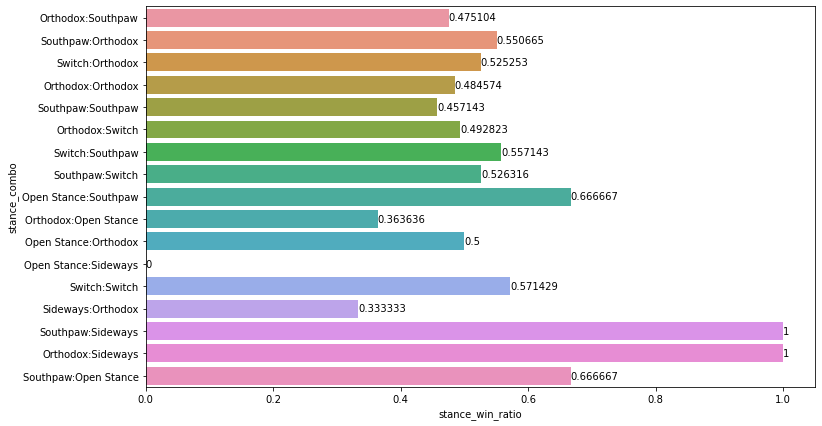

In [37]:
groupedvalues = stance_df.groupby('stance_combo').sum().reset_index()

plt.figure(figsize = (12,7))
ax = sns.barplot(data=stance_df, x="stance_win_ratio", y="stance_combo")
ax.bar_label(ax.containers[0])

* some stances gives significant edge ( >> 0.5) over its opponent stance,
* 1 or 0 stance_win_ratio is irrelevant (=only one time occured) so i will change it to 0.5 (=50:50 chance)

In [38]:
for i in range(0,len(stance_df)):
    
    if stance_df.loc[i,'stance_win_ratio'] == 1:
        stance_df.loc[i,'stance_win_ratio'] = 0.5
        
    if stance_df.loc[i,'stance_win_ratio'] == 0.0:
        stance_df.loc[i,'stance_win_ratio'] = 0.5 

# normalizing:
stance_df['stance_win_ratio'] = (stance_df['stance_win_ratio'] - np.mean(stance_df['stance_win_ratio']))/np.std(stance_df['stance_win_ratio'])        
stance_df.head(3)        

C:\Users\sagic\AppData\Local\Temp\ipykernel_22700\2694761572.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stance_df.loc[i,'stance_win_ratio'] = 0.5
C:\Users\sagic\AppData\Local\Temp\ipykernel_22700\2694761572.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stance_df.loc[i,'stance_win_ratio'] = 0.5
C:\Users\sagic\AppData\Local\Temp\ipykernel_22700\2694761572.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

,result,match,f_stance,o_stance,stance_combo,stance_win_ratio
0,win,Ciryl Gane:Tai Tuivasa,Orthodox,Southpaw,Orthodox:Southpaw,-0.688139
1,win,Robert Whittaker:Marvin Vettori,Orthodox,Southpaw,Orthodox:Southpaw,-0.688139
2,win,Nassourdine Imavov:Joaquin Buckley,Orthodox,Southpaw,Orthodox:Southpaw,-0.688139


In [39]:
features.append('stance_win_ratio')
df['stance_win_ratio'] = stance_df['stance_win_ratio']
print(features)

['norm_td_acc_dif', 'norm_td_def_dif', 'norm_sub_avg_dif', 'str_dif', 'slpm_dif', 'str. def_dif', 'str. acc._dif', 'sapm_dif', 'stance_win_ratio']


# <span style='color:green'> **[done]** </span> Feature Engineering = Win/Lose streak:

In [40]:
win_df = df[['result','match','f_win_perc','o_win_perc','f_win_strk','o_win_strk','f_lose_strk','o_lose_strk']]
win_df.head(3)

,result,match,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk
0,win,Ciryl Gane:Tai Tuivasa,0.89,0.67,1,0,0,1
1,win,Robert Whittaker:Marvin Vettori,0.79,0.67,1,0,0,1
2,win,Nassourdine Imavov:Joaquin Buckley,0.80,0.62,3,0,0,1


In [42]:
win_df['win_perc_dif'] = win_df['f_win_perc'] - win_df['o_win_perc']
win_df['win_perc_dif'] = (win_df['win_perc_dif'] - np.mean(win_df['win_perc_dif']))/np.std(win_df['win_perc_dif'])

win_df['win_strk_dif'] = win_df['f_win_strk'] - win_df['o_win_strk']
win_df['win_strk_dif'] = (win_df['win_strk_dif'] - np.mean(win_df['win_strk_dif']))/np.std(win_df['win_strk_dif'])

win_df['lose_strk_dif'] = win_df['f_lose_strk'] - win_df['o_lose_strk']
win_df['lose_strk_dif'] = (win_df['lose_strk_dif'] - np.mean(win_df['lose_strk_dif']))/np.std(win_df['lose_strk_dif'])

win_df = win_df[['result','match','win_perc_dif','win_strk_dif','lose_strk_dif']]
win_df.head(3)

C:\Users\sagic\AppData\Local\Temp\ipykernel_22700\547646865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win_df['win_perc_dif'] = win_df['f_win_perc'] - win_df['o_win_perc']
C:\Users\sagic\AppData\Local\Temp\ipykernel_22700\547646865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win_df['win_perc_dif'] = (win_df['win_perc_dif'] - np.mean(win_df['win_perc_dif']))/np.std(win_df['win_perc_dif'])
C:\Users\sagic\AppData\Local\Temp\ipykernel_22700\547646865.py:4: SettingWithCopyWarning: 
A value is tr

,result,match,win_perc_dif,win_strk_dif,lose_strk_dif
0,win,Ciryl Gane:Tai Tuivasa,0.434494,0.380719,-0.574004
1,win,Robert Whittaker:Marvin Vettori,0.236793,0.380719,-0.574004
2,win,Nassourdine Imavov:Joaquin Buckley,0.355414,1.132788,-0.574004


In [43]:
new_features = ['win_perc_dif','win_strk_dif','lose_strk_dif']
for feature in new_features:
    features.append(feature)
    df[feature] = win_df[feature]
    
print(features)    

['norm_td_acc_dif', 'norm_td_def_dif', 'norm_sub_avg_dif', 'str_dif', 'slpm_dif', 'str. def_dif', 'str. acc._dif', 'sapm_dif', 'stance_win_ratio', 'win_perc_dif', 'win_strk_dif', 'lose_strk_dif']


# <span style='color:green'> **[done]** </span> saving Features data file:

In [44]:
df.head(2)

,result,match,weight class,method,round,time,date,fighter,opponent,f_kd,o_kd,f_str,o_str,f_td,o_td,f_sub,o_sub,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,ttime,f_wins,f_losses,f_draws,f_height,f_weight,f_reach,f_stance,f_age,f_slpm,f_str. acc.,f_sapm,f_str. def,f_td avg.,f_td acc.,f_td def.,f_sub. avg.,o_wins,o_losses,o_draws,o_height,o_weight,o_reach,o_stance,o_age,o_slpm,o_str. acc.,o_sapm,o_str. def,o_td avg.,o_td acc.,o_td def.,o_sub. avg.,norm_td_acc_dif,norm_td_def_dif,norm_sub_avg_dif,str_dif,slpm_dif,str. def_dif,str. acc._dif,sapm_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
0,win,Ciryl Gane:Tai Tuivasa,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Ciryl Gane,Tai Tuivasa,1,1,110,29,0,0,0,0,0.89,0.67,1,0,0,1,14.383,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,15.0,4.0,0,187.96,118.80,190.50,Southpaw,29.0,4.12,0.50,4.24,0.45,0.00,0.00,0.52,0.0,0.724572,0.110516,0.476462,3.040149,0.631003,1.434947,0.749286,-1.221804,-0.688139,0.434494,0.380719,-0.574004
1,win,Robert Whittaker:Marvin Vettori,Middleweight,U-DEC:,3,5:00,2022-09-03,Robert Whittaker,Marvin Vettori,0,0,74,33,1,0,0,0,0.79,0.67,1,0,0,1,15.000,25.0,6.0,0,182.88,83.25,185.42,Orthodox,32.0,4.48,0.42,3.26,0.61,0.82,0.37,0.84,0.0,18.0,6.0,1,182.88,83.25,187.96,Southpaw,29.0,4.20,0.44,3.58,0.59,1.89,0.44,0.74,0.6,-0.253083,0.344439,-0.569086,1.536313,0.182952,0.174427,-0.142357,-0.196676,-0.688139,0.236793,0.380719,-0.574004


In [45]:
columns = ['result','fighter','opponent','date','weight class','method',]
for feature in features:
    columns.append(feature)

final_df = df[columns]   
final_df.head(10)

,result,fighter,opponent,date,weight class,method,norm_td_acc_dif,norm_td_def_dif,norm_sub_avg_dif,str_dif,slpm_dif,str. def_dif,str. acc._dif,sapm_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
0,win,Ciryl Gane,Tai Tuivasa,2022-09-03,Heavyweight,KO/TKO:Punches,0.724572,0.110516,0.476462,3.040149,0.631003,1.434947,0.749286,-1.221804,-0.688139,0.434494,0.380719,-0.574004
1,win,Robert Whittaker,Marvin Vettori,2022-09-03,Middleweight,U-DEC:,-0.253083,0.344439,-0.569086,1.536313,0.182952,0.174427,-0.142357,-0.196676,-0.688139,0.236793,0.380719,-0.574004
2,win,Nassourdine Imavov,Joaquin Buckley,2022-09-03,Middleweight,U-DEC:,-0.253083,0.344439,2.282409,0.182861,0.302853,0.678635,1.803046,-0.607955,-0.688139,0.355414,1.132788,-0.574004
3,win,Roman Kopylov,Alessio Di Chirico,2022-09-03,Middleweight,KO/TKO:Punches,-0.218166,0.143933,0.001213,0.746799,0.081983,-0.077677,0.425052,0.226880,1.989707,-0.059758,0.380719,-1.162132
4,win,William Gomis,Jarno Errens,2022-09-03,Featherweight,U-DEC:,2.086306,2.015319,-0.949286,0.446032,0.511102,0.678635,0.668227,-0.491323,1.989707,1.976561,0.380719,-0.574004
5,lose,Charles Jourdain,Nathaniel Wood,2022-09-03,Featherweight,U-DEC:,-1.335486,-0.825177,-0.093837,-0.418673,-0.309273,0.090392,0.100818,0.085695,1.089097,-0.613321,-0.747384,1.190382
6,lose,Dustin Stoltzfus,Abus Magomedov,2022-09-03,Middleweight,KO/TKO:Punches,1.213400,1.547472,0.476462,-0.268290,-12.078509,-4.531515,-4.762689,2.013181,-0.352538,-1.582055,-0.371349,0.602254
7,win,Nasrat Haqparast,John Makdessi,2022-09-03,Lightweight,U-DEC:,1.038819,-0.223660,0.001213,-0.343482,-0.284031,-0.329781,-0.466591,0.417173,1.989707,0.039092,0.380719,-0.574004
8,lose,Michal Figlak,Fares Ziam,2022-09-03,Lightweight,U-DEC:,-0.183250,-0.424166,0.001213,-1.208187,-0.403932,-1.842405,-1.196117,1.411609,-0.352538,-1.186654,-0.371349,0.602254
9,lose,Gabriel Miranda,Benoit Saint Denis,2022-09-03,Lightweight,KO/TKO:Punch,0.096080,-2.830233,-1.044335,-0.832228,-0.353448,-0.329781,0.181877,0.767067,-0.688139,-1.325044,-0.747384,0.602254


In [47]:
final_df.to_csv('data/ufc_data_features.csv')